In [23]:
import pandas as pd

In [24]:
df = pd.read_csv("raw_sales.csv",index_col='datesold',parse_dates=True)


In [25]:
df

,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,house,4
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-09,2905,380000,house,4
2007-03-21,2906,310000,house,3
...,...,...,...,...
2019-07-25,2900,500000,unit,3
2019-07-25,2612,560000,unit,2
2019-07-26,2912,464950,unit,2


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29580 entries, 2007-02-07 to 2019-07-26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   postcode      29580 non-null  int64 
 1   price         29580 non-null  int64 
 2   propertyType  29580 non-null  object
 3   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


In [27]:
import matplotlib.pyplot as plt

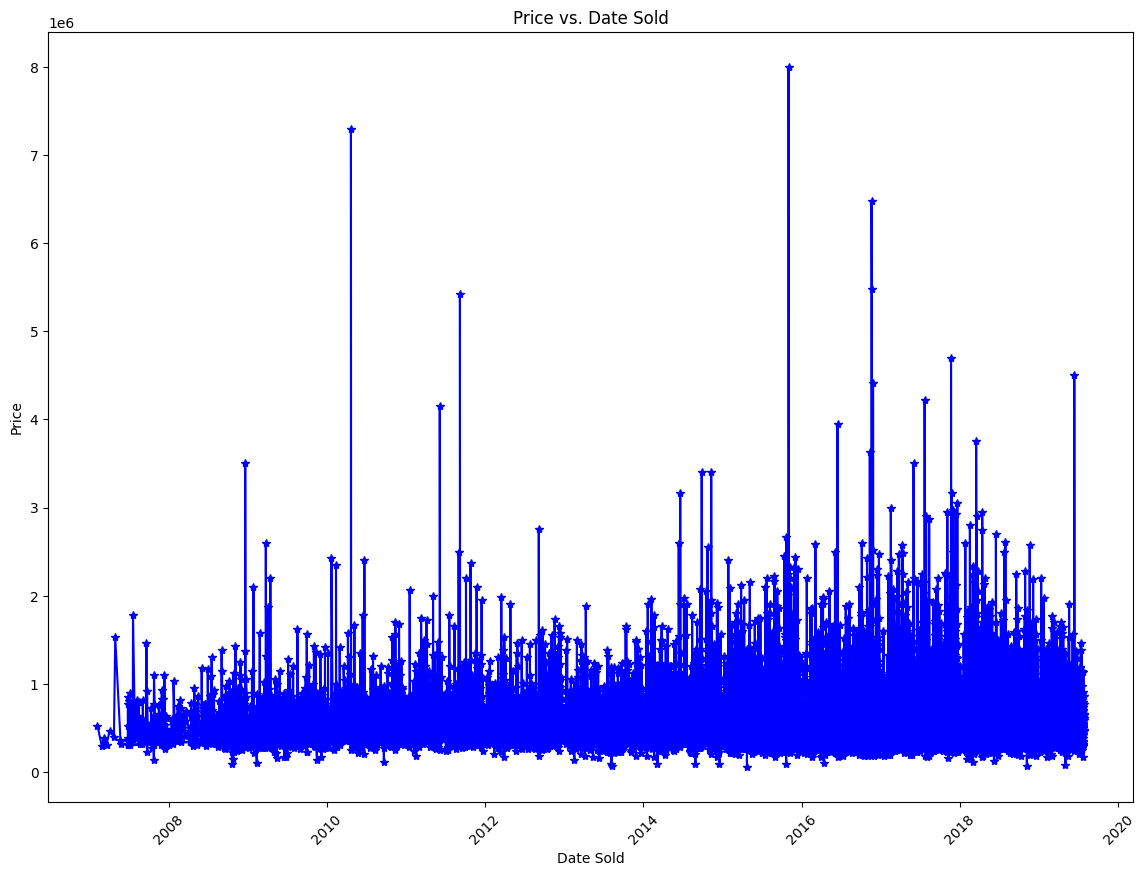

In [29]:
plt.figure(figsize=(14, 10))
plt.plot(df.index, df['price'], marker='*', linestyle='-', color='b')
plt.title('Price vs. Date Sold')
plt.xlabel('Date Sold')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

Even after visualizing we can't able to detect wheather the data is in stationarity or not.

So we are gonna make into statistical approach.

In [30]:
from statsmodels.tsa.stattools import adfuller

In [31]:
dft=adfuller(df['price'])

In [32]:
print(dft)

(np.float64(-10.435026739473543), np.float64(1.5745251680566056e-18), 50, 29529, {'1%': np.float64(-3.4305714727403305), '5%': np.float64(-2.8616378849073927), '10%': np.float64(-2.566822101159092)}, np.float64(817435.615696606))


In [33]:
for i in range(4):
    print(dft[i])

-10.435026739473543
1.5745251680566056e-18
50
29529


These values are 
1.ADF TEST VALUES
2.p-VALUE
#donno what the next 2 data is usefull for.
3.Number of lags used: [value]
4.Number of observations used for ADF regression: [value]

p-VALUE should be <0.05 to support null hypothesis.
But it isnt.
It confirms that our data is non-stationarity

So we are gonna make it stationarity

In [34]:
import numpy as np

In [37]:
df['price'] = np.log(df['price'])

df['new_price'] = df['price'].diff()
df.dropna(inplace=True)

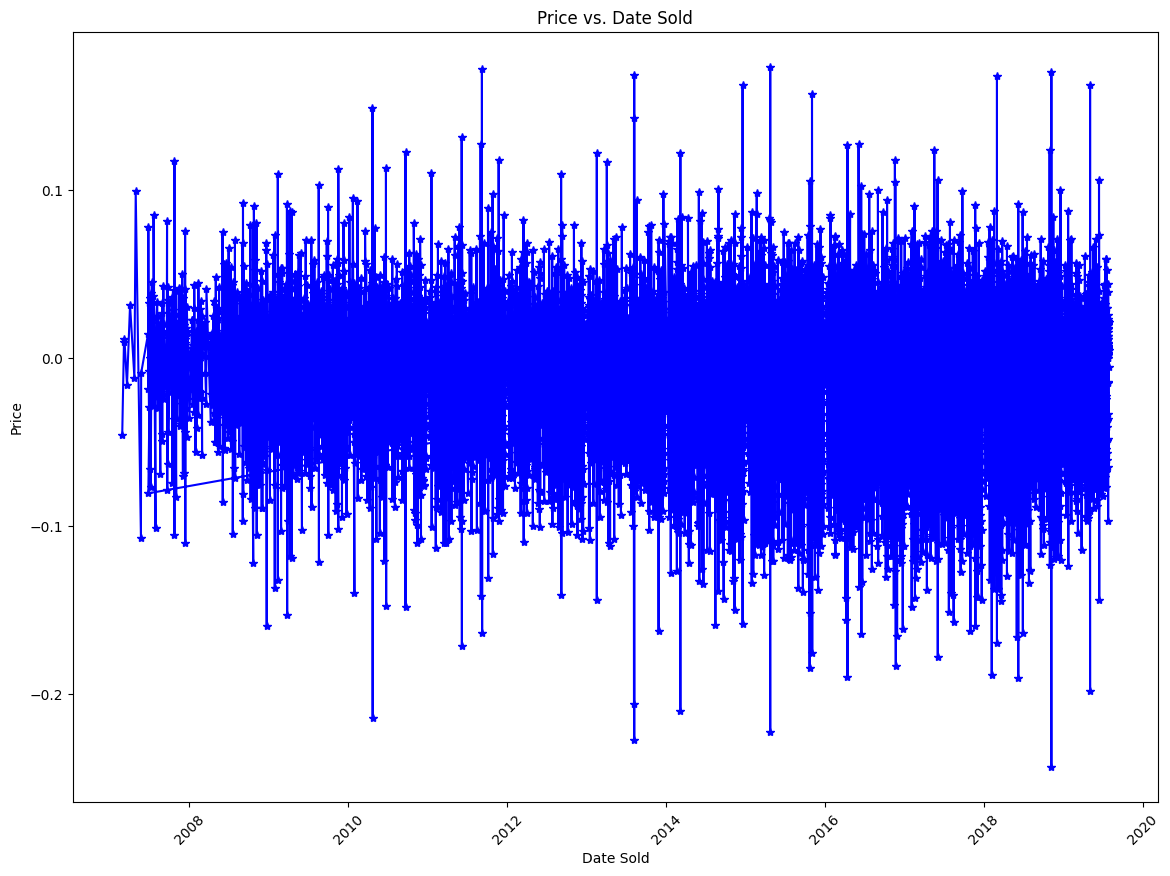

In [39]:
plt.figure(figsize=(14, 10))
plt.plot(df.index, df['new_price'], marker='*', linestyle='-', color='b')
plt.title('Price vs. Date Sold')
plt.xlabel('Date Sold')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [40]:
dft2 = adfuller(df['new_price'])

In [41]:
for i in range(4):
    print(dft2[i])

-41.506434827176385
0.0
50
29528


We got what we require.

In [44]:
train_data = df.iloc[:28000]
test_data = df.iloc[28000:]

In [45]:
train_data

,postcode,price,propertyType,bedrooms,new_price
datesold,,,,,
2007-02-27,2906,2.531920,house,3,-0.046109
2007-03-07,2905,2.541663,house,3,0.009742
2007-03-09,2905,2.553182,house,4,0.011520
2007-03-21,2906,2.537209,house,3,-0.015974
2007-04-04,2905,2.568772,house,4,0.031564
...,...,...,...,...,...
2017-10-10,2602,2.523200,unit,2,-0.058354
2017-10-10,2606,2.544488,unit,1,0.021287
2017-10-10,2617,2.562758,unit,3,0.018270


In [46]:
test_data

,postcode,price,propertyType,bedrooms,new_price
datesold,,,,,
2017-10-11,2611,2.531920,unit,1,-0.052992
2017-10-11,2604,2.569265,unit,2,0.037345
2017-10-11,2604,2.571202,unit,1,0.001937
2017-10-11,2602,2.576863,unit,2,0.005660
2017-10-12,2617,2.556973,unit,3,-0.019890
...,...,...,...,...,...
2019-07-25,2900,2.574318,unit,3,0.003917
2019-07-25,2612,2.582917,unit,2,0.008599
2019-07-26,2912,2.568764,unit,2,-0.014153


In [47]:
from statsmodels.tsa.arima.model import ARIMA

In [56]:
model = ARIMA(train_data['new_price'], order=(1, 1, 1))#p-ar,d-i,q-ma
model_fit = model.fit()

/Users/srigurubalaji/Desktop/TimeSeries/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/srigurubalaji/Desktop/TimeSeries/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/srigurubalaji/Desktop/TimeSeries/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/srigurubalaji/Desktop/TimeSeries/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it i

In [80]:
new_predict = model_fit.forecast(steps = 1579)

/Users/srigurubalaji/Desktop/TimeSeries/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [93]:
print(new_predict)

28000   -0.006001
28001    0.002046
28002   -0.000674
28003    0.000246
28004   -0.000065
           ...   
29574    0.000013
29575    0.000013
29576    0.000013
29577    0.000013
29578    0.000013
Name: predicted_mean, Length: 1579, dtype: float64


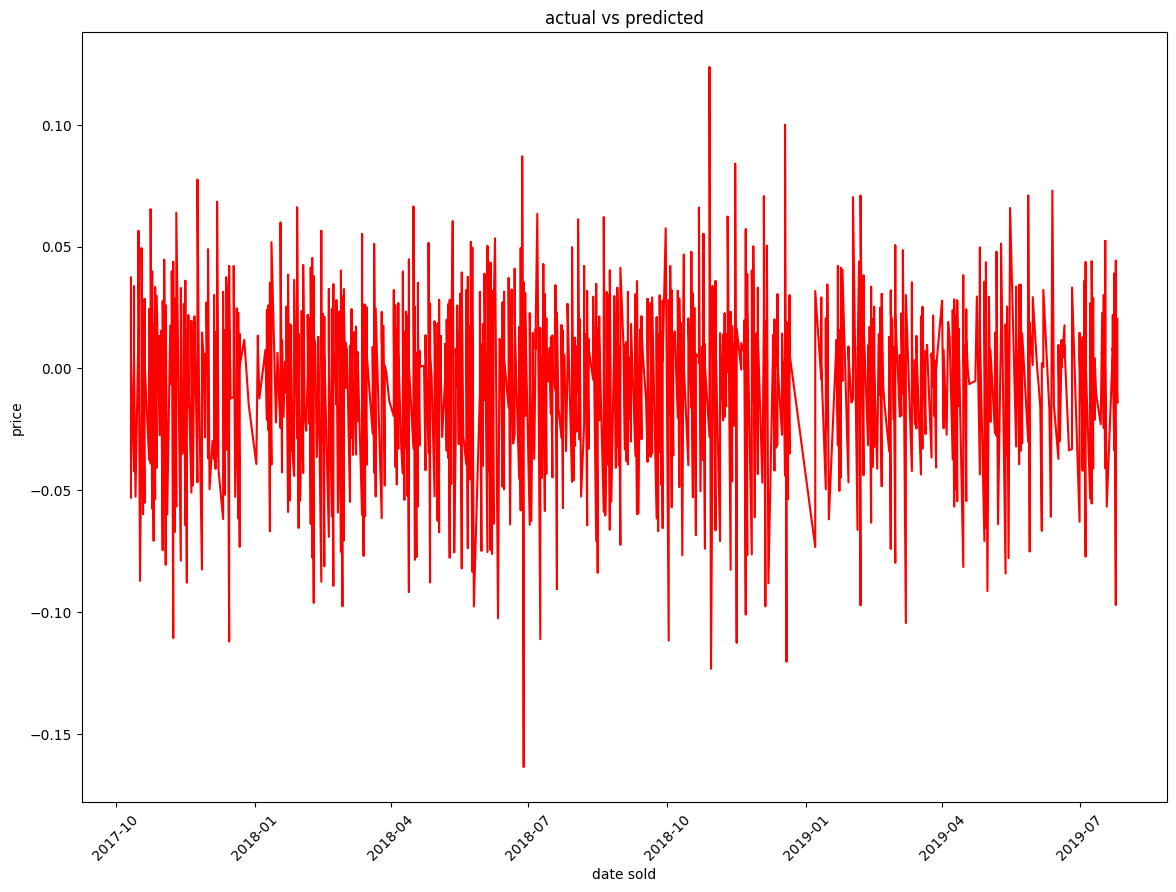

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(test_data.index,test_data['new_price'],color='r')
#plt.plot(new_predict.index,new_predict['predicted'],color = 'g')
#this one line alone is erroring. idky.
#i have prediced that with same value,but that i cant plot even alone.
plt.title('actual vs predicted')
plt.xlabel('date sold')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.show()

In [35]:
df = pd.read_csv("/content/raw_sales.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/raw_sales.csv'

In [ ]:
df

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29580 entries, 2007-02-07 to 2019-07-26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   postcode      29580 non-null  int64  
 1   price         29580 non-null  int64  
 2   propertyType  29580 non-null  float64
 3   bedrooms      29580 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.1 MB


In [ ]:
df['datesold'] = pd.to_datetime(df['datesold'],parses=)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [ ]:
df['datesold'] = pd.to_datetime(df['datesold'], format='%D/%M/%Y')
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [ ]:
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3


In [ ]:
import sklearn

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()

In [ ]:
df['propertyType'] = ohe.fit_transform(df[['propertyType']]).toarray()

In [ ]:
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,1.0,4
1,2007-02-27,2906,290000,1.0,3
2,2007-03-07,2905,328000,1.0,3
3,2007-03-09,2905,380000,1.0,4
4,2007-03-21,2906,310000,1.0,3


In [ ]:
df

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,1.0,4
1,2007-02-27,2906,290000,1.0,3
2,2007-03-07,2905,328000,1.0,3
3,2007-03-09,2905,380000,1.0,4
4,2007-03-21,2906,310000,1.0,3
...,...,...,...,...,...
29575,2019-07-25,2900,500000,0.0,3
29576,2019-07-25,2612,560000,0.0,2
29577,2019-07-26,2912,464950,0.0,2
29578,2019-07-26,2601,589000,0.0,2


In [ ]:
df.set_index('datesold', inplace=True)

In [ ]:
df

,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,1.0,4
2007-02-27,2906,290000,1.0,3
2007-03-07,2905,328000,1.0,3
2007-03-09,2905,380000,1.0,4
2007-03-21,2906,310000,1.0,3
...,...,...,...,...
2019-07-25,2900,500000,0.0,3
2019-07-25,2612,560000,0.0,2
2019-07-26,2912,464950,0.0,2


In [ ]:
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
endog_data = df['price']

In [ ]:

model = ARIMA(endog_data, order=(5, 1, 0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [ ]:

predictions = model_fit.predict(start=len(endog_data), end=len(endog_data) + 90)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
predictions

,predicted_mean
29580,636817.942867
29581,611155.205949
29582,606688.031492
29583,602621.608108
29584,620893.802573
...,...
29666,623334.112264
29667,623334.112264
29668,623334.112264
29669,623334.112264
